In [2]:
#Un dataset

#necessaire : 
#modèle - fonction de cout - gradients - descente de gradient

In [3]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1 - Dataset

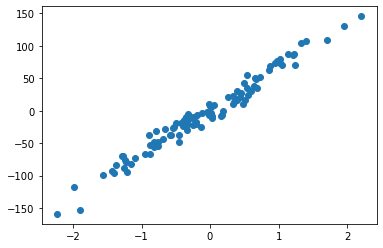

In [4]:
#génère un dataset LINEAIRE depuis la librairie sklearn
x, y = make_regression(n_samples=100, n_features = 1, noise = 10)
# display du dataset : 
plt.scatter(x, y)

In [5]:
print(x.shape)
#par defaut les dimentions de y sont incomplètes "(100, )"
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)
(100, 1)


In [8]:
#matrice X
#hstack permet de fusionner deux matrices, ones génére une matrice constitué de 1 de dimension comme paramètre
X = np.hstack((x, np.ones(x.shape)))
X.shape
X

array([[-1.55998693,  1.        ],
       [ 0.00678423,  1.        ],
       [ 1.13178669,  1.        ],
       [ 0.06389781,  1.        ],
       [-0.87539948,  1.        ],
       [ 0.19357987,  1.        ],
       [ 0.45402469,  1.        ],
       [-1.36914791,  1.        ],
       [-1.28262653,  1.        ],
       [-0.45035565,  1.        ],
       [-0.87875532,  1.        ],
       [-0.58799601,  1.        ],
       [-0.20987704,  1.        ],
       [ 0.59046702,  1.        ],
       [-0.75934149,  1.        ],
       [-0.33936767,  1.        ],
       [ 1.71090567,  1.        ],
       [-0.4949634 ,  1.        ],
       [-1.21446277,  1.        ],
       [ 0.03283808,  1.        ],
       [-0.24902867,  1.        ],
       [ 0.43187121,  1.        ],
       [ 0.68565026,  1.        ],
       [-0.31855808,  1.        ],
       [ 0.66722913,  1.        ],
       [ 0.39124287,  1.        ],
       [ 0.95406027,  1.        ],
       [ 0.54342739,  1.        ],
       [ 0.51354907,

In [9]:
theta = np.random.randn(2, 1)
theta

array([[-0.55806785],
       [-0.97381121]])

# 2 - Modèle

In [10]:
#modèle linéaire donc notre fonction doit être de la forme X.theta ainsi elle doit simplement retourner le produit matricielle
def model(X, theta):
    return X.dot(theta) #permet de faire le produit matricielle de X par theta

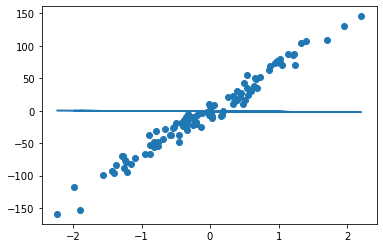

In [11]:
#tester le modèle
plt.scatter(x, y)
plt.plot(x, model(X, theta))
#courbe mauvaise

# 3 - Fonction cout

In [9]:
#Fonction cout est l'erreur quadratique moyenne : "1/2m * sum(X.theta - y)**2"
#m designe le nb de pts dans le data set, m = len(y)
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [10]:
cost_function(X, y, theta)

3094.564053700635

# 4 - Gradient & Descente de Gradient

In [11]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [12]:
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta

# 5 - Entrainement du modèle

In [13]:
theta_final = gradient_descente(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

In [14]:
theta_final

array([[96.18150184],
       [ 0.59305165]])

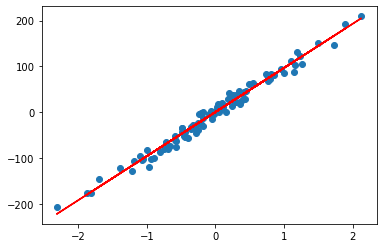

In [15]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

# BILAN : la courbe obtenue est desormais satisfaisante

# 6 - Comment tracer la minimisation avec la fonction cout
# La machine apprend elle bien ?

In [16]:
def gradient_descente(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [17]:
theta_final, cost_history = gradient_descente(X, y, theta, learning_rate = 0.01, n_iterations = 1000)

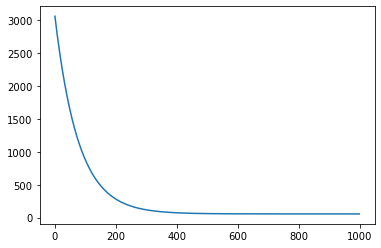

In [18]:
#Affiche l'évolution de la minimisation en fonction du nb d'itérations
plt.plot(range(1000), cost_history)

# 7 - Coefficient de determination | afficher les performance du modèle

In [19]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [20]:
coef_determination(y, predictions)

0.981420839045106